<a href="https://colab.research.google.com/github/AliPhaeez/ML/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing basic lib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. feature extraction


*   dictvectorizer 

converts ist of dict into feature matrix



In [ ]:
#sample data 

data = [{'age': 4, 'height':96.0},
{'age': 1, 'height':73.9},
{'age': 3, 'height':88.9},
{'age': 2, 'height':81.6}]

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv=DictVectorizer(sparse=False)
transformed_data=dv.fit_transform(data)
transformed_data

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

# 2. data imputation




*   Many machine learning algorithms need full feature matrix and they may not work in
presence of missing data.
*  Data imputation identifies missing values in each feature of the dataset and replaces them
with an appropriate value based on a fixed strategy such as
   * mean or median or mode of that feature.
  * use specified constant value.




In [ ]:
from tables import Column
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak','slope','ca','thal','num']
heart_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",header=None,names=cols)

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# null values for numerical datatype
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
# null values for non-numeric datatype  

print('unique values in ca : ', heart_data.ca.unique())
print('unique values in thal : ', heart_data.thal.unique())

unique values in ca :  ['0.0' '3.0' '2.0' '1.0' '?']
unique values in thal :  ['6.0' '3.0' '7.0' '?']


Both of them contain ? , which is a missing values. Let's count the number of missing values.

In [ ]:
print('# of missing values in ca :', heart_data.loc[heart_data.ca=='?','ca'].count()) 
print('# of missing values in thal :', heart_data.loc[heart_data.thal=='?','thal'].count())

# of missing values in ca : 4
# of missing values in thal : 2


Replace '?' with nan .

In [ ]:
heart_data.replace('?',np.nan ,inplace=True)

Fill the missing values with sklearn missing value imputation utilities.

In [ ]:
from sklearn.impute import SimpleImputer


we will try two variations


*   add_indicator = False : Default choice that only imputes missing values.
*   add_indicator = True : Adds additional column for each column containing missing
values. In our case, this adds two columns one for ca and other for thal . It indicates if
the sample has a missing value.


In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print (heart_data_imputed.shape)

(303, 14)


In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean',

add_indicator=True)

imputer = imputer.fit(heart_data)
heart_data_imputed_with_indicator = imputer.transform(heart_data)
print (heart_data_imputed_with_indicator.shape)

(303, 16)


In [ ]:
heart_data_imputed_with_indicator

array([[63.,  1.,  1., ...,  0.,  0.,  0.],
       [67.,  1.,  4., ...,  2.,  0.,  0.],
       [67.,  1.,  4., ...,  1.,  0.,  0.],
       ...,
       [57.,  1.,  4., ...,  3.,  0.,  0.],
       [57.,  0.,  2., ...,  1.,  0.,  0.],
       [38.,  1.,  3., ...,  0.,  1.,  0.]])

# 3. Feature scaling 
* Feature scaling transforms feature values such that all the features are on the same scale.
* When we use feature matrix with all features on the same scale, it provides us certain advantages as listed below:
 * Enables faster convergence in iterative optimization algorithms like gradient descent and
its variants.

 * The performance of ML algorithms such as SVM, K-NN and K-means etc that compute
 * euclidean distance among input samples gets impacted if the features are not scaled.
 * Tree based ML algorithms are not affected by feature-scaling. In other words, feature scaling is
not required for tree based ML algorithms.
  * Feature scaling can be performed with the following methods:
    * Standardization
    * Normalization

In [ ]:
cols1 = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight','Shell weight','Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None,names=cols1)

Feature scaling is performed only on numerical attributes. Let's check which are numerical
attributes in this dataset.

In [ ]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:

abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [ ]:
# Assign numerical value to sex.
abalone_data = abalone_data.replace({"Sex": {"M":1,"F":2, "I":3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


Separate labels from features.

In [ ]:
abalone_data.pop('Rings')
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


Examine feature scales
* Statistical method
 * Check the scales of different feature with describe() method of dataframe.


In [ ]:
abalone_data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,3.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


# Visualization of feature distributions

* Visualize feature distributions.
  * Histogram
  * Kernel density estimation (KDE) plot
  * Box
  * Violin

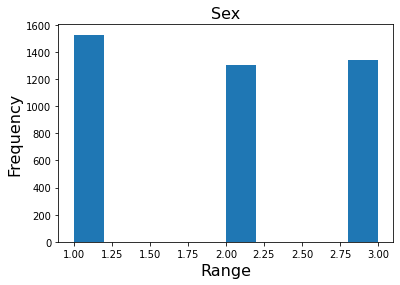

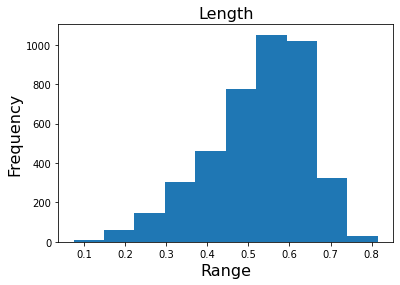

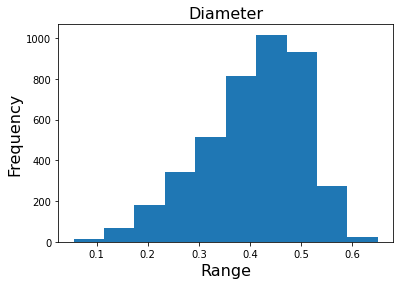

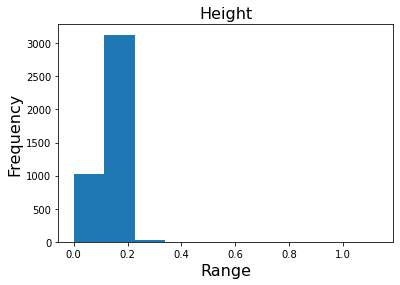

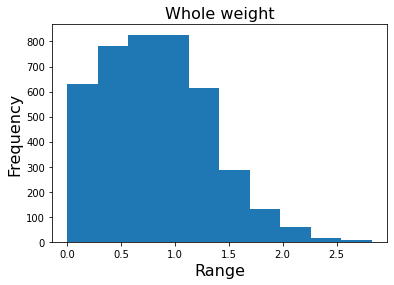

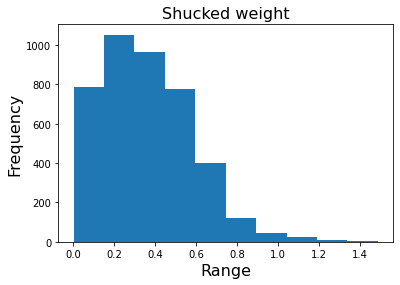

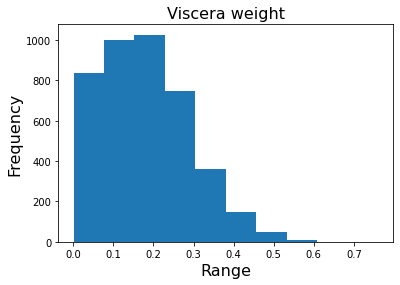

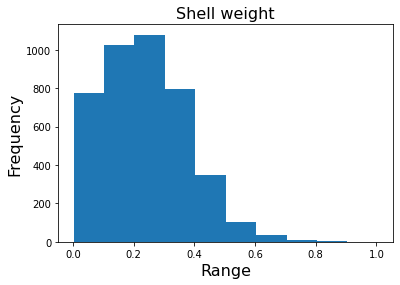

In [ ]:
for name in cols1[0:len(cols1)-1]:
  plt.hist(abalone_data[name].values) # histogram plot
  plt.title(name,fontsize=16)
  plt.xlabel('Range',fontsize=16)
  plt.ylabel('Frequency',fontsize=16)
  plt.show()

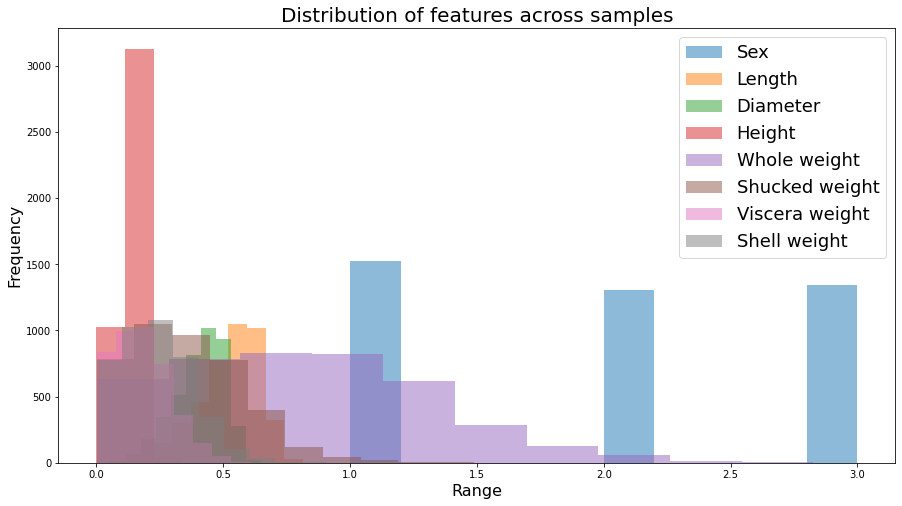

In [ ]:
plt.figure(figsize=(15,8))
for colname in abalone_data:
  plt.hist(abalone_data[colname].values, alpha=0.5)
# name the curves of features
in_cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight','Shell weight']
plt.legend(in_cols, fontsize=18,loc="upper right",frameon=True)
plt.title('Distribution of features across samples',fontsize=20)
plt.xlabel('Range',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.show()

# Alternatively, we can generate Kernel Density Estimate plot using Gaussian kernels.
* In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable.
* This function uses Gaussian kernels and includes automatic bandwidth determination.

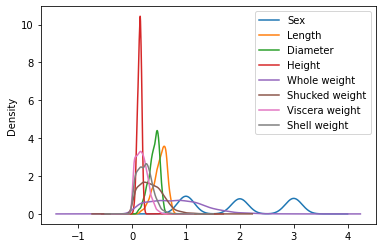

In [ ]:
#@title [KDE plots - combined] [KDE plots - combined]
ax = abalone_data.plot.kde()

Observe that the features have different distributions and scales.

# Box plot

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that
* facilitates comparisons between variables or across levels of a categorical variable.
* The box shows the quartiles of the dataset while the whiskers extend to show the rest of the
distribution, except for points that are determined to be “outliers” using a method that is a
function of the inter-quartile range.

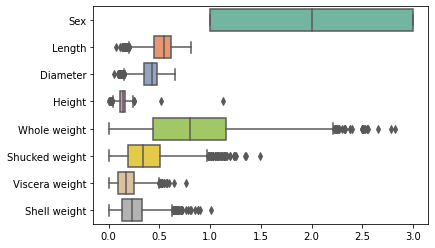

In [ ]:
ax = sns.boxplot(data=abalone_data, orient="h", palette="Set2")

# Violin plot

A violin plot plays a similar role as a box and whisker plot.
It shows the distribution of quantitative data across several levels of one (or more) categorical
variables such that those distributions can be compared.
Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin
plot features a kernel density estimation of the underlying distribution.

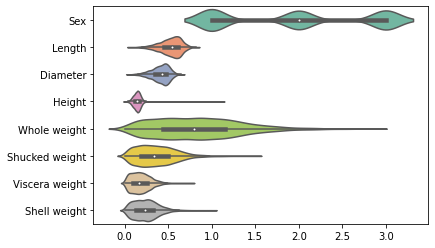

In [ ]:
ax = sns.violinplot(data=abalone_data, orient="h", palette="Set2", scale="width")

Looking at these plots, we conclude that features are on different scales.

# 4. scaling
##   normalisation
The features are normalized such that their range lies between [0,1] or [-1,1]
 * There are two way to achieve this.
  * MaxAbsoluteScaler transforms features in range [-1, 1]
  * MinMaxScaler transforms features in range [0, 1]

In [ ]:
x= np.array([4, 2, 5, -2, -100]).reshape(-1,1)
print(x)

[[   4]
 [   2]
 [   5]
 [  -2]
 [-100]]


In [ ]:
from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
print(x_new)

[[ 0.04]
 [ 0.02]
 [ 0.05]
 [-0.02]
 [-1.  ]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = abalone_data
mm = MinMaxScaler()
X_normalized = mm.fit_transform(X)
X_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

In [ ]:
X_normalized.mean(axis=0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 ])

In [ ]:

X_normalized.std(axis=0)

array([0.4138578 , 0.16226829, 0.16676972, 0.03701066, 0.17366046,
       0.14925109, 0.14430695, 0.13870055])

The means and SDs of different features are now comparable. We can confirm this again
through visualization as before:

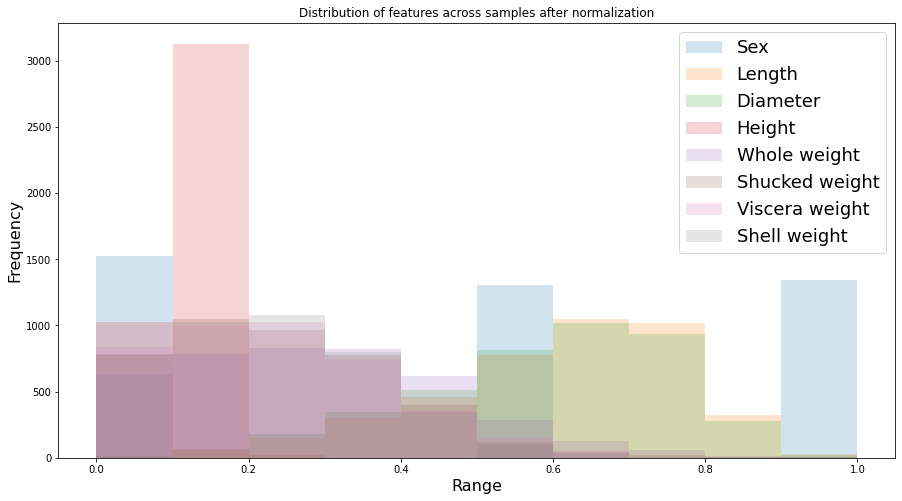

In [ ]:
plt.figure(figsize=(15,8))
# convert ndarray into dataframe for plotting the histogram
data=pd.DataFrame(X_normalized, columns=in_cols)
for colname in abalone_data:
  plt.hist(data[colname].values, alpha=0.2)
plt.legend(in_cols, fontsize=18,loc="upper right",frameon=True)
plt.title('Distribution of features across samples after normalization')
plt.xlabel('Range',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.show()

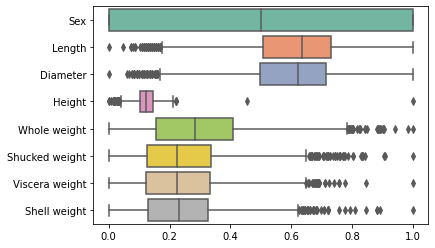

In [ ]:
ax = sns.boxplot(data=data, orient="h", palette="Set2")

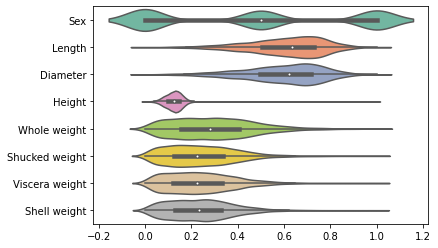

In [ ]:
ax = sns.violinplot(data=data, orient="h", palette="Set2", scale="width")

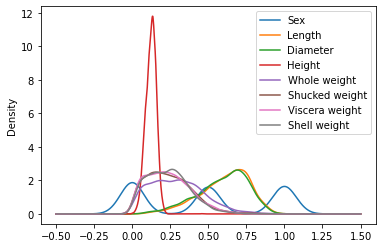

In [ ]:
ax = data.plot.kde()

# Standardization

Standardization is another feature scaling technique that results into (close to) zero mean and
unit standard deviation of a feature's values.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_standardized = ss.fit_transform(X)
X_standardized[:5]

array([[-1.15434629, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
        -0.4634999 , -0.35668983, -0.20713907],
       [-1.15434629, -0.69947638, -0.43214879, -0.34709919, -0.63781934,
        -0.64823753, -0.60759966, -0.60229374],
       [ 1.26194258, -1.61554351, -1.54070702, -1.42308663, -1.27208566,
        -1.2159678 , -1.28733718, -1.32075677]])

In [ ]:
X_standardized.mean(axis=0)

array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        9.18585294e-17, -1.02065033e-17,  2.70472337e-16,  2.97689679e-16])

In [ ]:
X_standardized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

The means of different features are now comparable with SD=1.

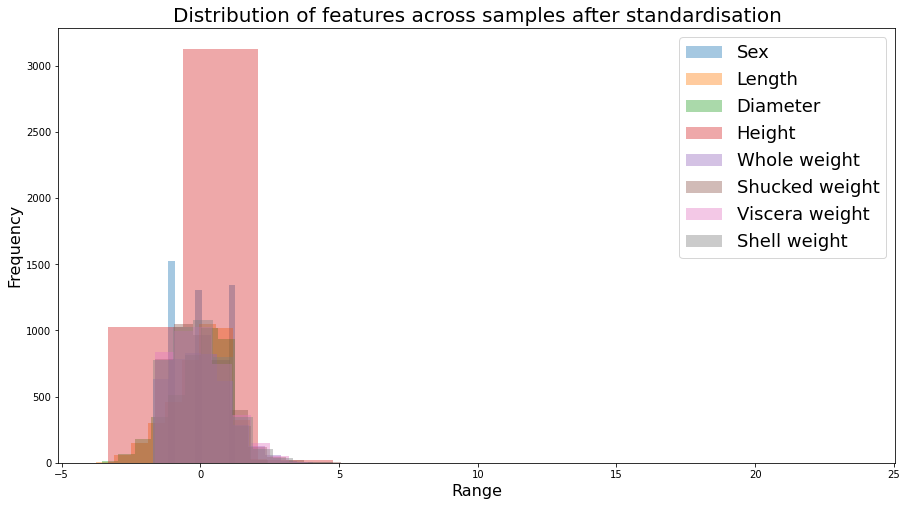

In [ ]:
plt.figure(figsize=(15,8))
data=pd.DataFrame(X_standardized, columns=in_cols)
for colname in abalone_data:
  plt.hist(data[colname].values, alpha=0.4)
plt.legend(in_cols, fontsize=18,loc="upper right",frameon=True)
plt.title('Distribution of features across samples after standardisation',fontsize=20)
plt.xlabel('Range',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.show()

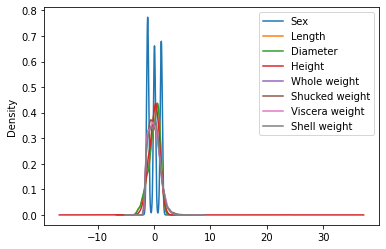

In [ ]:
ax = data.plot.kde()

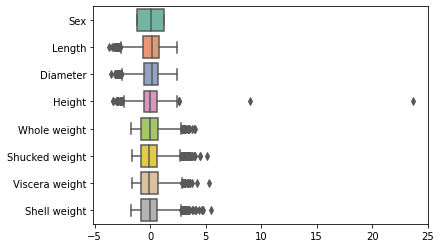

In [ ]:
ax = sns.boxplot(data=data, orient="h", palette="Set2")

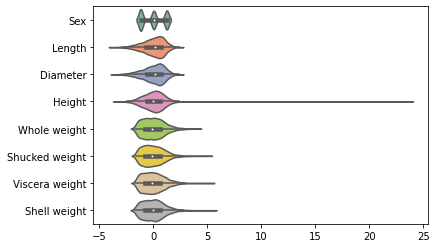

In [ ]:
ax = sns.violinplot(data=data, orient="h", palette="Set2", scale="width")

# 4. add_dummy_feature
Augments dataset with a column vector, each value in the column vector is . This is useful for
adding a parameter for bias term in the model.

In [ ]:
x = np.array(
[[7, 1 ],
[1, 8 ],
[2, 0 ],
[9, 6 ]])

In [ ]:
from sklearn.preprocessing import add_dummy_feature
x_new=add_dummy_feature(x)

In [ ]:
print(x_new)

[[1. 7. 1.]
 [1. 1. 8.]
 [1. 2. 0.]
 [1. 9. 6.]]


# 5. Custom transformers
Enables conversion of an existing Python function into a transformer to assist in data cleaning
or processing.

Useful when:
1. The dataset consists of heterogeneous data types (e.g. raster images and text captions),
2. The dataset is stored in a pandas.DataFrame and different columns require different
processing pipelines.
3. We need stateless transformations such as taking the log of frequencies, custom scaling,
etc.

In [ ]:
from sklearn.preprocessing import FunctionTransformer


You can implement a transformer from an arbitrary function with FunctionTransformer .

* For example, let us build a transformer that applies a log transformation to features:
You can implement a transformer from an arbitrary function with FunctionTransformer . 

* For this demonstration, we will be using a wine quality dataset from UCI machine learning
repository.

In [ ]:
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")

In [ ]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Let's use np.log1p which returns natural logarithm of (1 + the feature value).

In [ ]:
transformer=FunctionTransformer(np.log1p,validate=True)
wine_data_transformed=transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformed,columns=wine_data.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


Notice the change in statistics of all features.

# 6. Polynomial Features
Generate a new feature matrix consisting of all polynomial combinations of the features with
degree less than or equal to the specified degree.
* For example, if an input sample is two dimensional and of the form [a,b] the degree-2
polynomial features are [1, a, b, ab, a^2, b^2].

sklearn.preprocessing.PolynomialFeatures enables us to perform polynomial transformation
of desired degree. Let's demonstrate it with wine quality dataset.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
wine_data_copy = wine_data.copy()
wine_data = wine_data.drop(['quality'], axis=1)
print('Number of features before transformation = ', wine_data.shape)

Number of features before transformation =  (1599, 11)


In [ ]:
# Let us fit a polynomial of degree 2 to wine_data
poly = PolynomialFeatures(degree=2)
poly_wine_data = poly.fit_transform(wine_data)
print('Number of featueres after transformation = ', poly_wine_data.shape)

Number of featueres after transformation =  (1599, 78)


Note that after transformation, we have 78 features. Let's list out these features:

In [ ]:
poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

## Observe that -
* Some features have ^2 suffix - these are degree 2 features of the input features. 
 * For example, sulphates^2 is the square of sulphates features.
* Some features are combination of names of the original feature names.
 * For example,
total sulfur dioxide pH is a combination of two features total sulfur dioxide and
pH .

# 7. Discretization
Discretization (otherwise known as quantization or binning) provides a way to partition
continuous features into discrete values.
* Certain datasets with continuous features may benefit from discretization, because
discretization can transform the dataset of continuous attributes to one with only nominal
attributes.
* One-hot encoded discretized features can make a model more expressive, while
maintaining interpretability.
* For instance, pre-processing with a discretizer can introduce nonlinearity to linear models.

In [ ]:
# KBinsDiscretizer discretizes features into k bins
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
wine_data = wine_data_copy.copy()
# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode="onehot")
X = np.array(wine_data['chlorides']).reshape(-1, 1)
X_binned = enc.fit_transform(X)

In [ ]:
X_binned

<1599x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

In [ ]:
# since output is sparse, use to_array() to expand it.
X_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

# 8. Handling Categorical Features
We need to convert the categorical features into numeric features.
1. Ordinal encoding
2. One-hot encoding
3. Label encoder
4. Using dummy variables

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

Let's
demonstrate this concept with Iris dataset.

In [ ]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width','label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None,names=cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are three class labels. Let's convert them to one hot vectors.

In [ ]:
onehotencoder = OneHotEncoder(categories='auto')
print('Shape of y before encoding', iris_data.label.shape)

'''
Passing 1d arrays as data to onehotencoder is deprecated in version ,
hence reshape to (-1,1) to have two dimensions.
Input of onehotencoder fit_transform must not be 1-rank array
'''

iris_labels = onehotencoder.fit_transform(iris_data.label.values.reshape(-1,1))
# y.reshape(-1,1) is a 450x1 sparse matrix of type '<class 'numpy.float64'>'
# with 150 stored elements in Coordinate format.
# y is a 150x3 sparse matrix of type '<class 'numpy.float64'>' with 150 stored
# elements in compressed sparse row format.
print('Shape of y after encoding', iris_labels.shape)
# since output is sparse use to_array() to expand it.
print ("First 5 labels:")
print(iris_labels.toarray()[:5])
print("last five labels:")
print(iris_labels.toarray()[-5:])

Shape of y before encoding (150,)
Shape of y after encoding (150, 3)
First 5 labels:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
last five labels:
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


difference between one hot encoding and ordinal encoding.

In [ ]:
enc = OrdinalEncoder()
iris_labels = np.array(iris_data['label'])
iris_labels_transformed = enc.fit_transform(iris_labels.reshape(-1, 1))
print ("Unique labels:", np.unique(iris_labels_transformed))

print ("\nFirst 5 labels:")
print (iris_labels_transformed[:5])

Unique labels: [0. 1. 2.]

First 5 labels:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


# label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# get the class column in a new variable
iris_labels = np.array(iris_data['label'])
# encode the class names to integers
enc = LabelEncoder()
label_integer = enc.fit_transform(iris_labels)
label_integer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# MultilabelBinarizer
Encodes categorical features with value between 0 and k-1, where k is number of classes.

In [ ]:
movie_genres =[{'action', 'comedy' },

{'comedy'},
{'action', 'thriller'},
{'science-fiction', 'action', 'thriller'}]

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(movie_genres)

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

# Using dummy variables


In [ ]:
# use get_dummies to create a one-hot encoding for each unique categorical value in the 'c
# Convert categorical class variable to one-hot encoding:
iris_data_onehot = pd.get_dummies(iris_data, columns=['label'], prefix=['one_hot'])
iris_data_onehot

,sepal length,sepal width,petal length,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1
